In [12]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import time

In [32]:

    timeout = 55   # [seconds] 5 min
    global Bcnt
    global Rcnt
    global Ycnt
    global Fcnt

    time.sleep(0.1)
    timeout_start = time.time()
           # capture frames from the camera
    Bcnt=0
    Rcnt=0
    Ycnt =0
    Fcnt =0
#    video_src = 'IMG_1075.MOV'
#    webcam = cv2.VideoCapture(video_src)
    minarea =1000
    maxarea =4000
    contoursX =[]


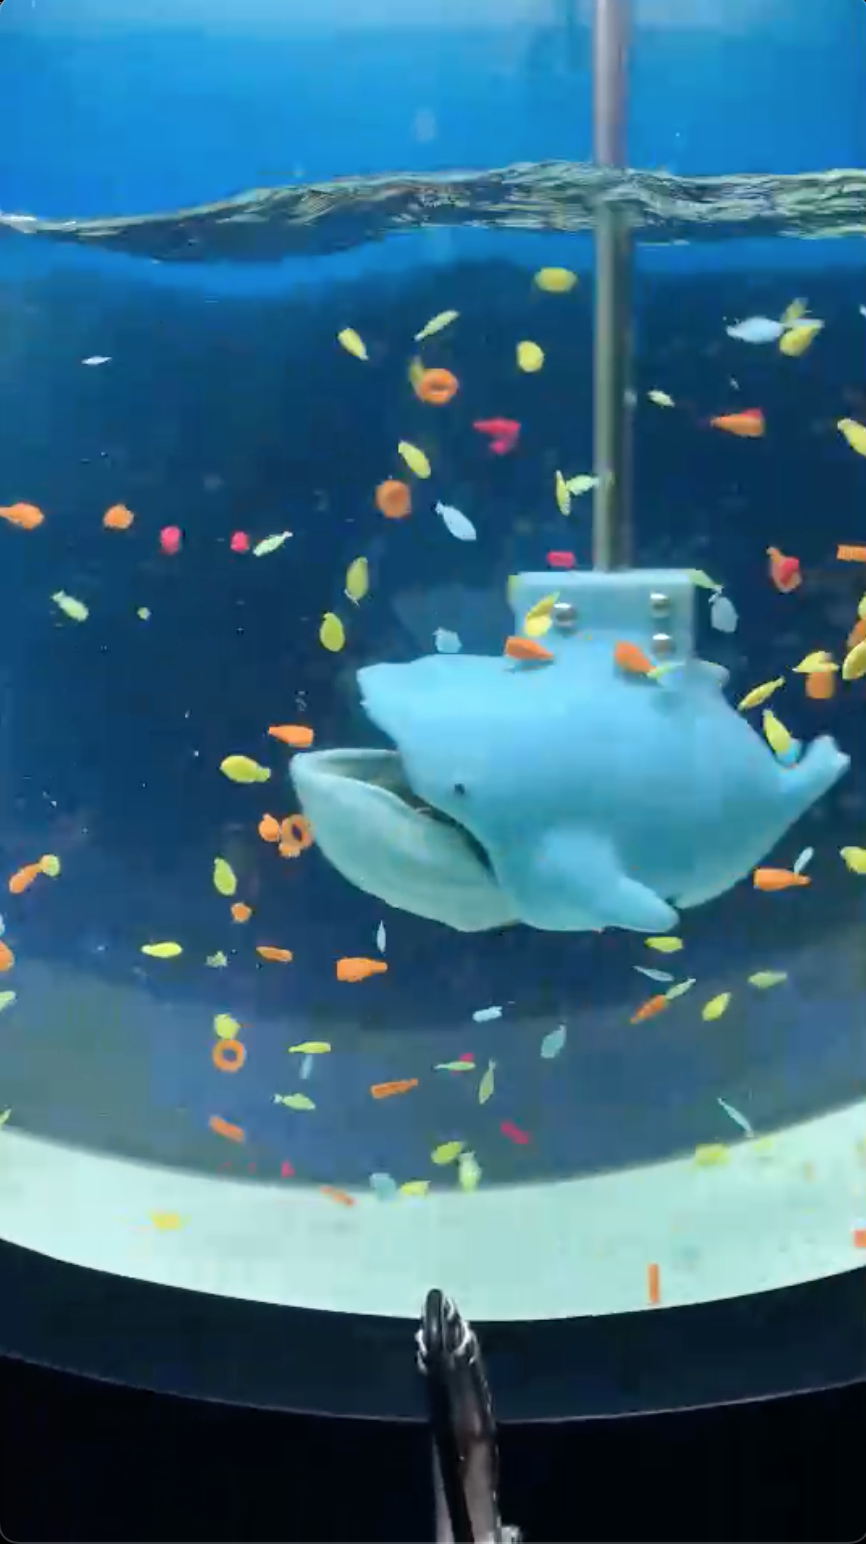

In [13]:
imageFrame=cv2.imread('test01.png')
cv2_imshow(imageFrame)

In [ ]:
#ret, imageFrame = webcam.read()
Roiframe =imageFrame
LUV = cv2.cvtColor(Roiframe, cv2.COLOR_BGR2LUV)
blur = cv2.blur(LUV, (3, 3) )
erude = cv2.erode(blur, (3, 3))
dilation = cv2.dilate(erude, (3, 3))
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, (7,7))
edges = cv2.Canny(closing, 5, 40)
#edges = cv2.Canny(LUV, 10, 100)

cv2_imshow(edges)

In [ ]:
    hsvFrame = cv2.cvtColor(Roiframe, cv2.COLOR_BGR2HSV)

    #gray [y:y+h, x:x+w]
    # Set range for red color and
    # define mask RGB
    red_lower = np.array([145, 65, 100], np.uint8)
    red_upper = np.array([239, 255, 240], np.uint8)
    red_mask = cv2.inRange(hsvFrame, red_lower, red_upper)
    cv2_imshow(red_mask)
    #red_ratio =np.array([175/175,1/175,1/175],np.float)

    yellow_lower = np.array([1, 65, 85], np.uint8)
    yellow_upper = np.array([21,255,240], np.uint8)
    yellow_mask = cv2.inRange(hsvFrame, yellow_lower, yellow_upper)
    cv2_imshow(yellow_mask)
    # Set range for green color and
    # define mask Fish
    green_lower = np.array([21, 70, 90], np.uint8)
    green_upper = np.array([90, 255,240], np.uint8)
    green_mask = cv2.inRange(hsvFrame, green_lower, green_upper)
    #cv2_imshow(green_mask)
    # Set range for blue color and
    # define mask
    blue_lower = np.array([90, 60, 90], np.uint8)
    blue_upper = np.array([140, 255, 240], np.uint8)
    blue_mask = cv2.inRange(hsvFrame, blue_lower, blue_upper)
    #cv2_imshow(blue_mask)

In [27]:
    # Morphological Transform, Dilation
    # for each color and bitwise_and operator
    # between imageFrame and mask determines
    # to detect only that particular color
    kernal = np.ones((9, 9), "uint8")

    # For red color
    red_mask = cv2.dilate(red_mask, kernal)
    res_red = cv2.bitwise_and(Roiframe, Roiframe, mask = red_mask)

    yellow_mask = cv2.dilate(yellow_mask, kernal)
    res_yellow = cv2.bitwise_and(Roiframe, Roiframe, mask = yellow_mask)
    # For green color Fish
    green_mask = cv2.dilate(green_mask, kernal)
    res_green = cv2.bitwise_and(Roiframe, Roiframe, mask = green_mask)

    # For blue color
    blue_mask = cv2.dilate(blue_mask, kernal)
    res_blue = cv2.bitwise_and(Roiframe, Roiframe, mask = blue_mask)

    # Creating contour to track red color
    contours1, hierarchy = cv2.findContours(red_mask, cv2.RETR_EXTERNAL  ,cv2.CHAIN_APPROX_NONE)


In [41]:
for pic, contour in enumerate(contours1):

      area = cv2.contourArea(contour)
      #print(area)
      if(area > minarea and area < maxarea):
          x, y, w, h = cv2.boundingRect(contour)

          cv2.drawContours(Roiframe, contour, -1, (0, 0, 255), 2)
          cv2.putText(Roiframe, "GarR", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0,(0, 0, 255))
          Rcnt =Rcnt+1
          #cv2_imshow(Roiframe[y:y+h,x:x+w])
          #cv2.waitKey(1)
          #print ("red")
print (Rcnt)
      # Creating contour to track green color

39


In [42]:
            contours2, hierarchy = cv2.findContours(green_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)

            for pic, contour in enumerate(contours2):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (0, 255, 0), 2)

                    cv2.putText(Roiframe, "Fish", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 250, 0))
                    Fcnt=Fcnt+1
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    #cv2.waitKey(10)
            #print ("Fish")
            print (Fcnt)
            # detect yellow fish
            contours3, hierarchy = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)

            #print (str(len(contours)))
            for pic, contour in enumerate(contours3):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (250, 253, 223), 2)
                    #Roiframe = cv2.rectangle(Roiframe, (x, y), (x + w, y + h), (223, 253, 250), )
                    cv2.putText(Roiframe, "GarY ", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (250, 253, 223))
                    Ycnt=Ycnt+1
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    #cv2.waitKey(10)
            #print ("yellow")
            print (Ycnt)

            # Creating contour to track blue color
            contours4, hierarchy = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)
            for pic, contour in enumerate(contours4):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (255, 0, 0), 2)


                    #Roiframe = cv2.rectangle(Roiframe, (x, y), (x + w, y + h),(255, 0, 0), 1)

                    cv2.putText(Roiframe, "FishB", (x, y), cv2.FONT_HERSHEY_SIMPLEX,   1.0, (254, 254, 74))
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    #cv2.waitKey(10)
                    Bcnt = Bcnt+1
            #print ("Blue")
            print (Bcnt)


163
114
6


217
152
8


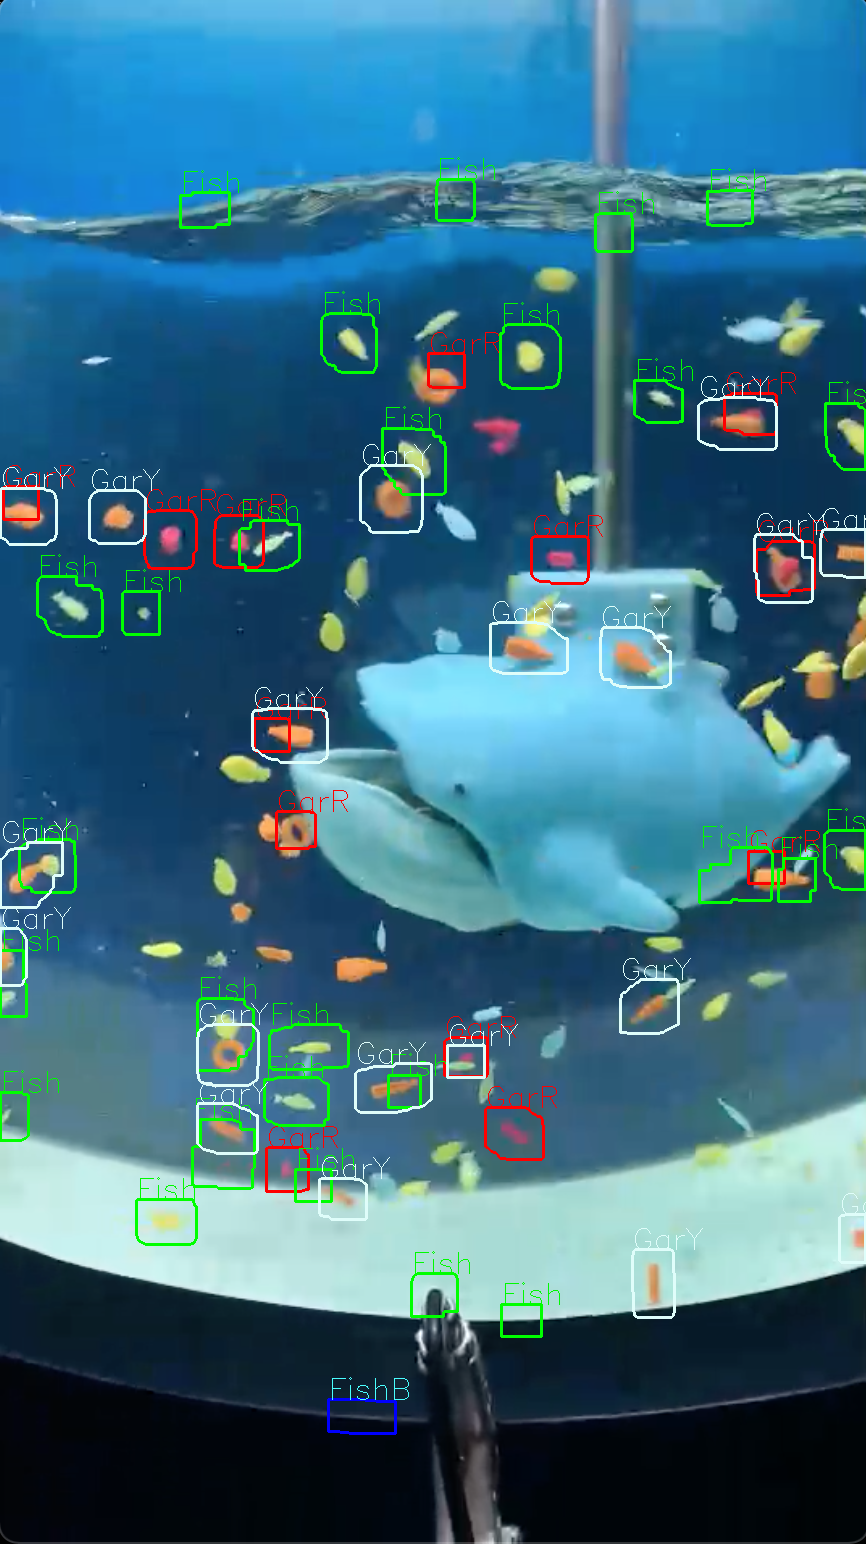

Gabage: 191


In [44]:
            contours2, hierarchy = cv2.findContours(green_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)

            for pic, contour in enumerate(contours2):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (0, 255, 0), 2)

                    cv2.putText(Roiframe, "Fish", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 250, 0))
                    Fcnt=Fcnt+1
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    #cv2.waitKey(10)
            #print ("Fish")
            print (Fcnt)
            # detect yellow fish
            contours3, hierarchy = cv2.findContours(yellow_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)

            #print (str(len(contours)))
            for pic, contour in enumerate(contours3):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (250, 253, 223), 2)
                    #Roiframe = cv2.rectangle(Roiframe, (x, y), (x + w, y + h), (223, 253, 250), )
                    cv2.putText(Roiframe, "GarY ", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (250, 253, 223))
                    Ycnt=Ycnt+1
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    #cv2.waitKey(10)
            #print ("yellow")
            print (Ycnt)

            # Creating contour to track blue color
            contours4, hierarchy = cv2.findContours(blue_mask, cv2.RETR_EXTERNAL  , cv2.CHAIN_APPROX_NONE)
            for pic, contour in enumerate(contours4):
                area = cv2.contourArea(contour)
                if(area > minarea and area < maxarea):
                    x, y, w, h = cv2.boundingRect(contour)
                    cv2.drawContours(Roiframe, contour, -1, (255, 0, 0), 2)


                    #Roiframe = cv2.rectangle(Roiframe, (x, y), (x + w, y + h),(255, 0, 0), 1)

                    cv2.putText(Roiframe, "FishB", (x, y), cv2.FONT_HERSHEY_SIMPLEX,   1.0, (254, 254, 74))
                    #cv2_imshow(Roiframe[y:y+h,x:x+w])
                    cv2.waitKey(10)
                    Bcnt = Bcnt+1
            #print ("Blue")
            print (Bcnt)
            cv2_imshow(Roiframe)
            print ("Gabage:", Rcnt+Ycnt)